In [53]:
# Imports

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [54]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train ,y_train) , (x_test, y_test) = mnist.load_data()

In [55]:
# Normalize the pixel values
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

In [56]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [57]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
# Train the model
model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0105
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9970 - loss: 0.0105
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9968 - loss: 0.0116
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9969 - loss: 0.0107
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0090
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9977 - loss: 0.0088
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9976 - loss: 0.0086
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9979 - loss: 0.0078
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9970 - loss: 0.0099
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9977 - loss: 0.0074
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9976 - loss: 0.0072
Epoch 12/20
1875/1875 ━━━━━━━━

In [70]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9706 - loss: 0.1989
Loss: 0.17714473605155945, Accuracy: 0.9753999710083008


In [105]:
# Load and preprocess the custom image
image_path = 'digits/num6.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension


In [106]:
# Make prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


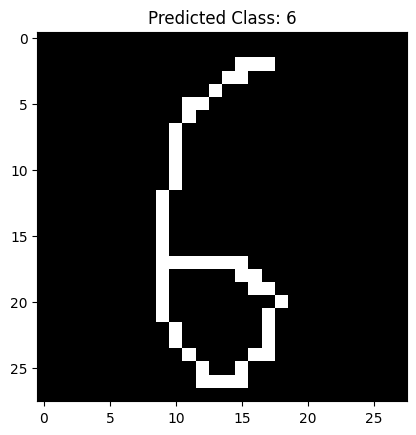

Prediction Result: [[1.4550802e-30 2.6176453e-25 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.2006390e-25 1.0000000e+00 0.0000000e+00 4.9445082e-31 0.0000000e+00]]
Predicted Class: 6


In [108]:
# Display the image and predicted class
plt.imshow(img[0], cmap=plt.cm.binary)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

print("Prediction Result:", prediction)
print("Predicted Class:", predicted_class)
